In [1]:
!git clone https://github.com/OmdenaAI/benin-chapter-red-blood-cells.git


Cloning into 'benin-chapter-red-blood-cells'...
remote: Enumerating objects: 3153, done.
remote: Counting objects: 100% (3153/3153), done.
remote: Compressing objects: 100% (2618/2618), done.
remote: Total 3153 (delta 500), reused 3153 (delta 500), pack-reused 0
Receiving objects: 100% (3153/3153), 873.58 MiB | 22.72 MiB/s, done.
Resolving deltas: 100% (500/500), done.
Updating files: 100% (3002/3002), done.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import numpy as np
from sklearn.neighbors import KernelDensity
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [32]:
root_folder_path = '/content/benin-chapter-red-blood-cells/src/data/datasets'

class_file_path = os.path.join('/content/benin-chapter-red-blood-cells/src/data/datasets/Slice_2', 'Classes.txt')
with open(class_file_path, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

for folder_path, dirs, files in os.walk(root_folder_path):
    for filename in files:
        if filename.endswith('.txt') and filename != 'Classes.txt':  # Only process .txt files (assuming YOLO files have .txt extension) and skip Classes.txt
            yolo_path = os.path.join(folder_path, filename)
            with open(yolo_path, 'r') as f:
                yolo_data = f.readlines()

            detections = []
            for line in yolo_data:
                line = line.strip().split(' ')
                try:
                    class_id = int(line[0])
                except ValueError:
                    break

                class_name = class_names[class_id]  # Replace class_id with class_name from Classes.txt
                x_center = line[1]
                y_center = line[2]
                width = line[3]
                height = line[4]
                detections.append({
                    'class_name': class_name,
                    'x_center': x_center,
                    'y_center': y_center,
                    'width': width,
                    'height': height,
                    'txt_file': filename
                })

            if detections:  
                csv_filename = os.path.splitext(filename)[0] + '.csv'  
                csv_path = os.path.join('/content', csv_filename)
                with open(csv_path, 'w', newline='') as f:
                  writer = csv.DictWriter(f, fieldnames=['class_name', 'x_center', 'y_center', 'width', 'height', 'txt_file'])
                  writer.writeheader()
                  for detection in detections:
                      writer.writerow(detection)




In [33]:
folder_path = '/content'

csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

dfs = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)
concatenated_df = pd.concat(dfs)

output_path = os.path.join(folder_path, 'concatenated.csv')
concatenated_df.to_csv(output_path, index=False)

for csv_file in csv_files:
    os.remove(csv_file)


In [34]:
df = pd.read_csv('concatenated.csv')

df

,class_name,x_center,y_center,width,height,txt_file
0,Normal,0.702247,0.044944,0.057303,0.080899,025source.txt
1,Normal,0.859831,0.328090,0.072472,0.103371,025source.txt
2,Normal,0.853090,0.077528,0.058989,0.069663,025source.txt
3,Normal,0.879213,0.150562,0.050562,0.067416,025source.txt
4,Normal,0.190730,0.035955,0.048876,0.071910,025source.txt
...,...,...,...,...,...,...
17029,Others,0.162491,0.875977,0.075002,0.068359,FieldPos127_EDOF_RGB.tiff_02_02.txt
17030,Others,0.104156,0.767578,0.071669,0.085938,FieldPos127_EDOF_RGB.tiff_02_02.txt
17031,Others,0.816675,0.536133,0.116670,0.115234,FieldPos127_EDOF_RGB.tiff_02_02.txt
17032,Others,0.880844,0.638672,0.088336,0.121094,FieldPos127_EDOF_RGB.tiff_02_02.txt


In [35]:
df.describe()

,x_center,y_center,width,height
count,17034.000000,17034.000000,17034.000000,17034.000000
mean,0.500971,0.495239,0.079028,0.092029
std,0.285191,0.284179,0.032139,0.037629
min,0.006250,0.006250,0.001494,0.004494
25%,0.253090,0.248438,0.055618,0.067729
50%,0.502500,0.492188,0.071875,0.085028
75%,0.746094,0.742697,0.096669,0.107422
max,0.995313,0.993750,0.257617,0.337695


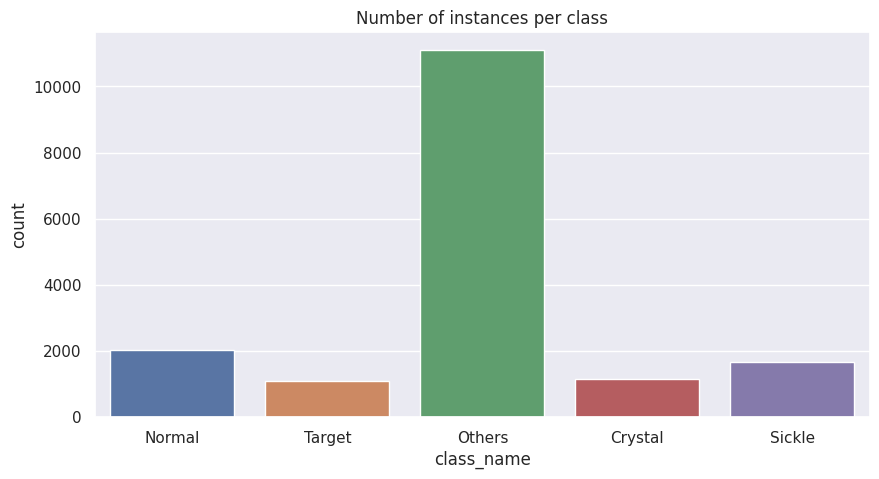

In [37]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='class_name')
plt.title('Number of instances per class')
plt.show()

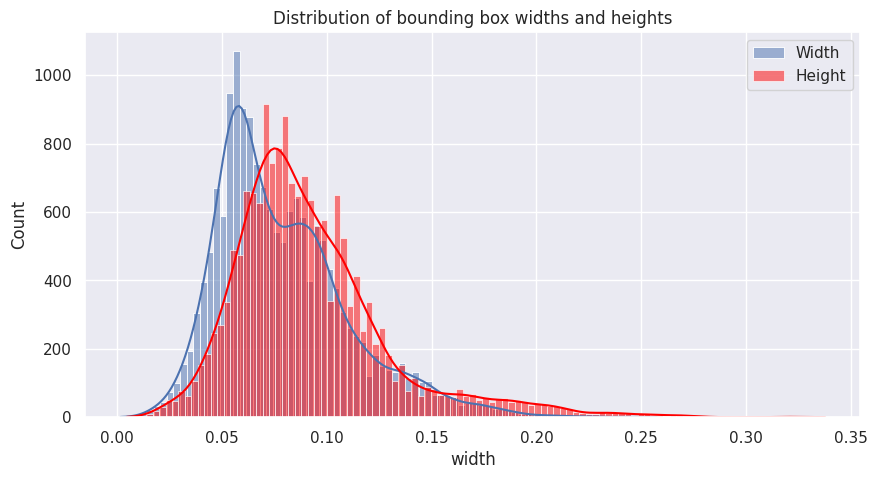

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(df['width'], kde=True, label='Width')
sns.histplot(df['height'], kde=True, color='red', label='Height')
plt.legend()
plt.title('Distribution of bounding box widths and heights')
plt.show()

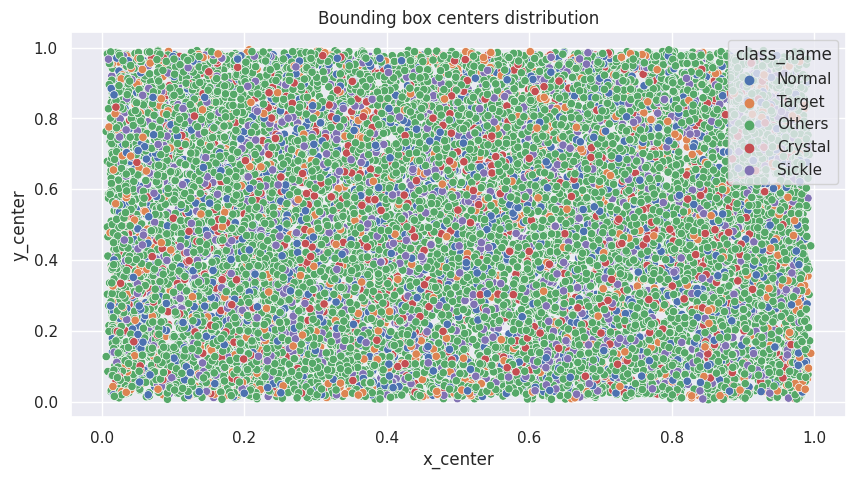

In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='x_center', y='y_center', hue='class_name')
plt.title('Bounding box centers distribution')
plt.show()

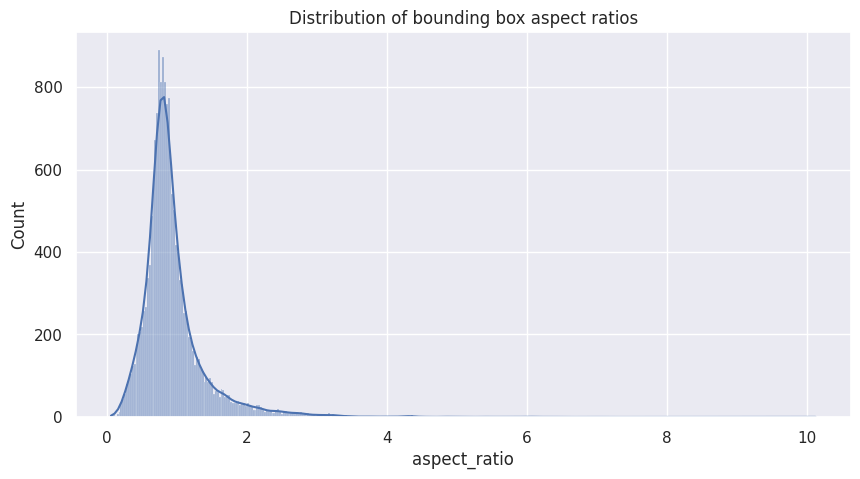

In [40]:
df['aspect_ratio'] = df['width'] / df['height']

plt.figure(figsize=(10, 5))
sns.histplot(df['aspect_ratio'], kde=True)
plt.title('Distribution of bounding box aspect ratios')
plt.show()

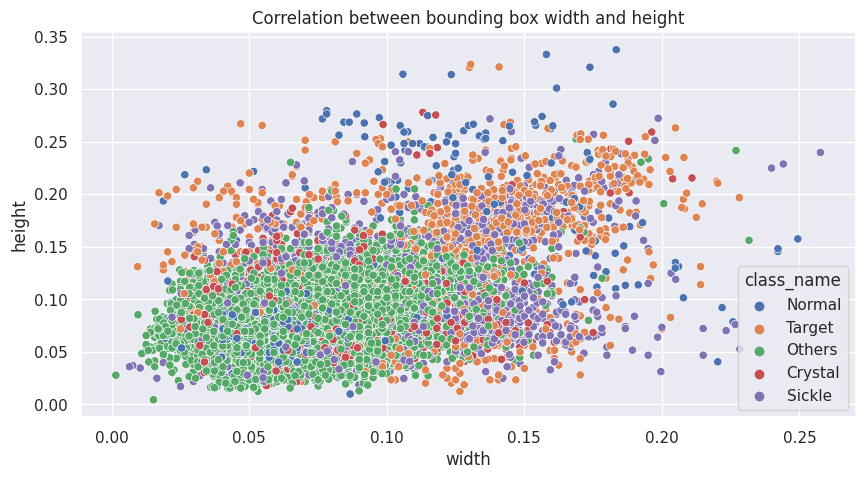

In [41]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='width', y='height', hue='class_name')
plt.title('Correlation between bounding box width and height')
plt.show()

In [42]:
average_size = df.groupby('class_name').mean()[['width', 'height']]
print(average_size)

               width    height
class_name                    
Crystal     0.077107  0.086081
Normal      0.064348  0.082491
Others      0.073939  0.086419
Sickle      0.105100  0.108181
Target      0.120425  0.148793


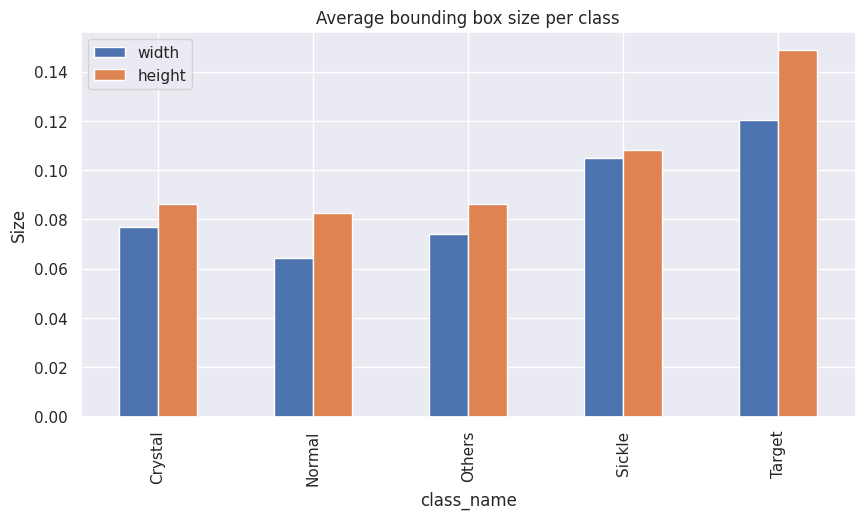

In [43]:
average_size.plot(kind='bar', figsize=(10, 5))
plt.title('Average bounding box size per class')
plt.ylabel('Size')
plt.show()

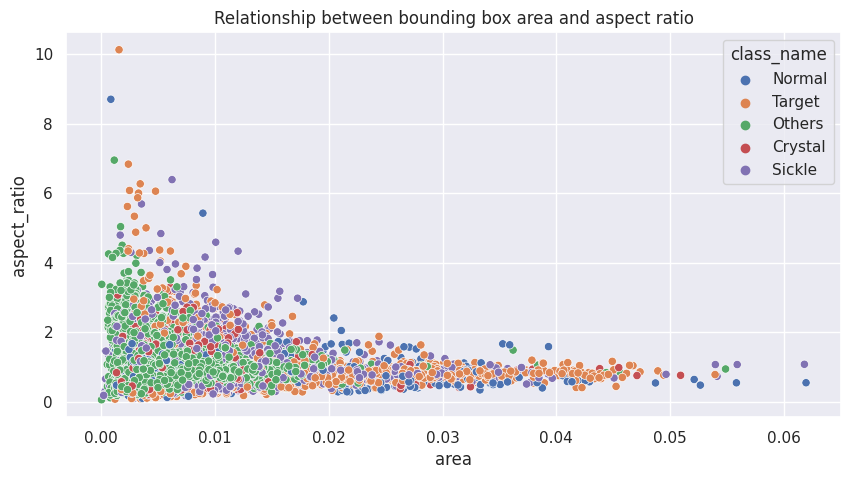

In [44]:
df['area'] = df['width'] * df['height']

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='area', y='aspect_ratio', hue='class_name')
plt.title('Relationship between bounding box area and aspect ratio')
plt.show()

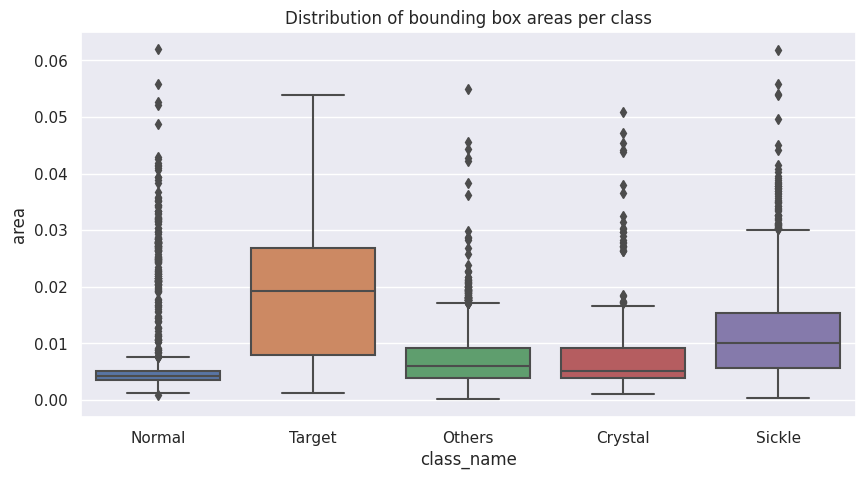

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='class_name', y='area')
plt.title('Distribution of bounding box areas per class')
plt.show()

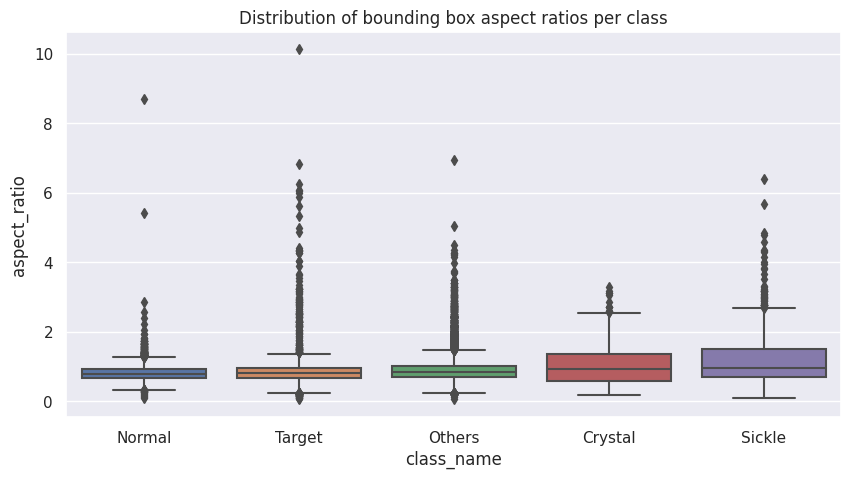

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='class_name', y='aspect_ratio')
plt.title('Distribution of bounding box aspect ratios per class')
plt.show()


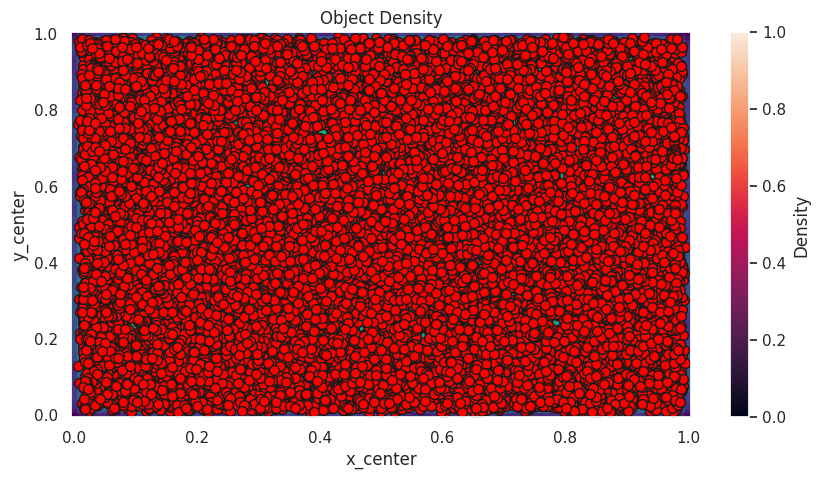

In [48]:
# Prepare the data for KDE
X = df[['x_center', 'y_center']].values

# Create and fit the Kernel Density model
kde = KernelDensity(kernel='gaussian', bandwidth=0.02).fit(X)

# Generate a grid for the density map
x_grid, y_grid = np.mgrid[0:1:100j, 0:1:100j]
grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

# Evaluate the density on the grid points
density = np.exp(kde.score_samples(grid_points))
density = density.reshape(x_grid.shape)

# Visualize the density map
plt.figure(figsize=(10, 5))
plt.pcolormesh(x_grid, y_grid, density, cmap='viridis', shading='auto')
plt.scatter(X[:, 0], X[:, 1], c='red', edgecolors='k', s=50)
plt.xlabel('x_center')
plt.ylabel('y_center')
plt.title('Object Density')
plt.colorbar(label='Density')
plt.show()
